In [1]:
import os 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# 
listings = pd.read_csv('listings2019.csv')
listings.info(verbose = True, null_counts = True)

/Users/mj/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20556 entries, 0 to 20555
Data columns (total 106 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20556 non-null  int64  
 1   listing_url                                   20556 non-null  object 
 2   scrape_id                                     20556 non-null  int64  
 3   last_scraped                                  20556 non-null  object 
 4   name                                          20541 non-null  object 
 5   summary                                       19459 non-null  object 
 6   space                                         14914 non-null  object 
 7   description                                   20089 non-null  object 
 8   experiences_offered                           20556 non-null  object 
 9   neighborhood_overview                         13351 non-null

In [3]:
listings = listings.drop(columns=['thumbnail_url', 'notes', 'medium_url', 'xl_picture_url', 
                                  'host_acceptance_rate', 'license', 'jurisdiction_names',
                                 ], )

In [235]:
listings[(listings['price']> 20) & (listings['price']< 400)].count()

id                                              19012
name                                            18997
summary                                         18058
space                                           13799
description                                     18580
neighborhood_overview                           12350
transit                                         11291
access                                           9866
interaction                                     10632
house_rules                                     12595
host_id                                         19012
host_name                                       19002
host_since                                      19002
host_location                                   18975
host_about                                      12064
host_response_time                              16736
host_response_rate                              16736
host_is_superhost                               19002
host_neighbourhood          

In [4]:
listings.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20556 entries, 0 to 20555
Data columns (total 99 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20556 non-null  int64  
 1   listing_url                                   20556 non-null  object 
 2   scrape_id                                     20556 non-null  int64  
 3   last_scraped                                  20556 non-null  object 
 4   name                                          20541 non-null  object 
 5   summary                                       19459 non-null  object 
 6   space                                         14914 non-null  object 
 7   description                                   20089 non-null  object 
 8   experiences_offered                           20556 non-null  object 
 9   neighborhood_overview                         13351 non-null 

In [6]:
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
listings['price']

0        130.0
1         60.0
2         33.0
3        210.0
4         45.0
         ...  
20551     75.0
20552     99.0
20553     60.0
20554     79.0
20555    120.0
Name: price, Length: 20556, dtype: float64

In [7]:
listings['security_deposit'] = listings['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
listings['security_deposit']

0        150.0
1        150.0
2        100.0
3        300.0
4          NaN
         ...  
20551      0.0
20552      NaN
20553      NaN
20554      NaN
20555      NaN
Name: security_deposit, Length: 20556, dtype: float64

In [8]:
listings['cleaning_fee'] = listings['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
listings['cleaning_fee']

0        42.0
1        50.0
2         NaN
3        80.0
4         NaN
         ... 
20551    50.0
20552     NaN
20553     NaN
20554     NaN
20555     NaN
Name: cleaning_fee, Length: 20556, dtype: float64

In [9]:
listings['extra_people'] = listings['extra_people'].replace('[\$,]', '', regex=True).astype(float)
listings['extra_people']

0        25.0
1        30.0
2        10.0
3        10.0
4        25.0
         ... 
20551     0.0
20552     0.0
20553     0.0
20554     0.0
20555     0.0
Name: extra_people, Length: 20556, dtype: float64

In [10]:
listings['weekly_price'] = listings['weekly_price'].replace('[\$,]', '', regex=True).astype(float)
listings['weekly_price']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
20551   NaN
20552   NaN
20553   NaN
20554   NaN
20555   NaN
Name: weekly_price, Length: 20556, dtype: float64

In [11]:
listings['monthly_price'] = listings['monthly_price'].replace('[\$,]', '', regex=True).astype(float)
listings['monthly_price']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
20551   NaN
20552   NaN
20553   NaN
20554   NaN
20555   NaN
Name: monthly_price, Length: 20556, dtype: float64

In [44]:
listings['host_response_rate'] = listings['host_response_rate'].replace('[%\,]', '', regex=True).astype(float)
listings['host_response_rate']

0        100.0
1        100.0
2        100.0
3        100.0
4        100.0
         ...  
20551      NaN
20552      NaN
20553    100.0
20554      NaN
20555      NaN
Name: host_response_rate, Length: 20556, dtype: float64

In [161]:
b = listings['price'] < 10
listings[b]

,id,name,summary,space,description,neighborhood_overview,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4119,8990923,Comfortable Cama,i'm living with my husband in a flat and we're...,NaN,i'm living with my husband in a flat and we're...,NaN,NaN,NaN,NaN,NaN,46963628,Simo,2015-10-19,"Steinerberg, Canton of Schwyz, Switzerland",NaN,NaN,NaN,f,La Font d'en Fargues,1.0,"['phone', 'reviews']",t,f,"Barcelona, Catalunya, Spain",La Font d'en Fargues,la Font d'en Fargues,Horta-Guinardó,Barcelona,Catalunya,08032,Barcelona,"Barcelona, Spain",ES,Spain,41.42519,2.16099,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,9.0,NaN,NaN,NaN,NaN,1,0.0,1,1125,1.0,1125.0,t,0,1,0,2015-10-22,2015-10-22,100.0,8.0,6.0,10.0,t,f,f,flexible,f,f,1,0,1,0,0.02
5686,13873341,"Central, clean & good room",Mi alojamiento es bueno para aventureros.,NaN,Mi alojamiento es bueno para aventureros.,NaN,NaN,NaN,NaN,NaN,53444312,Guido,2016-01-05,"Ramos Mejía, Buenos Aires, Argentina",NaN,NaN,NaN,f,NaN,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Barcelona, Catalunya, Spain",La Sagrada Família,la Sagrada Família,Eixample,Barcelona,Catalunya,08013,Barcelona,"Barcelona, Spain",ES,Spain,41.40432,2.17774,f,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Kitchen,""Smoking allowed"",Elevator,""Family/ki...",NaN,9.0,NaN,NaN,NaN,NaN,1,0.0,1,1125,1.0,1125.0,t,0,1,0,2016-08-16,2016-08-16,100.0,10.0,10.0,10.0,t,f,f,flexible,f,f,1,0,1,0,0.03
7243,17806078,habitacion,hola gatinho,NaN,hola gatinho,NaN,NaN,NaN,NaN,NaN,31590542,Sabrina,2015-04-20,"Brasília, Federal District, Brazil",NaN,NaN,NaN,f,Camp d'en Grassot i Gràcia Nova,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Barcelona, Catalunya, Spain",Gràcia,el Camp d'en Grassot i Gràcia Nova,Gràcia,Barcelona,Catalunya,08037,Barcelona,"Barcelona, Spain",ES,Spain,41.40291,2.16294,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Smoking allo...",NaN,7.0,NaN,NaN,NaN,NaN,1,0.0,1,1125,1.0,1125.0,t,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,t,t,f,flexible,f,f,1,0,1,0,NaN
9678,22218299,Habitacion individual exterior en Sants,"Ventana a calle peatonal, bien comunicado, cer...",vistas panorámicas · residencial · picnics de ...,"Ventana a calle peatonal, bien comunicado, cer...","Un barrio con muchas ramblas peatonales, tanto...",Badal | Metro línea 5 (L5) Autobuses badal 70 ...,"Se puede usar la cocina, lavadora, salón. Como...",Siempre una sonrisa y un obsequio con su visita.,NaN,162349823,Andrea,2017-12-12,"Barcelona, Catalonia, Spain",NaN,NaN,NaN,f,NaN,1.0,"['email', 'phone', 'reviews']",t,f,"Barcelona, Catalunya, Spain",Sants-Montjuïc,Sants - Badal,Sants-Montjuïc,Barcelona,Catalunya,08028,Barcelona,"Barcelona, Spain",ES,Spain,41.37486,2.13015,f,Other,Private room,1,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Pets al

In [204]:
a = listings['price'] > 5000
# listings[a]

In [78]:
listings['maximum_nights_avg_ntm']

0         730.0
1        1125.0
2        1125.0
3        1125.0
4         730.0
          ...  
20551     183.0
20552    1125.0
20553    1125.0
20554      31.0
20555      12.0
Name: maximum_nights_avg_ntm, Length: 20556, dtype: float64

In [62]:
# CONFUSED
listings['maximum_nights_avg_ntm'].value_counts()

1.125000e+03    11017
3.000000e+01     1142
3.650000e+02      598
3.300000e+02      488
7.000000e+00      458
9.000000e+01      436
1.500000e+01      416
1.124000e+03      413
3.100000e+01      374
1.800000e+02      318
6.000000e+01      315
1.000000e+01      309
5.000000e+00      263
2.700000e+01      202
3.000000e+02      194
2.000000e+01      168
6.000000e+00      155
1.400000e+01      149
9.990000e+02      142
3.600000e+02      138
4.000000e+00      137
1.200000e+02      126
8.000000e+00      116
3.200000e+01      109
2.000000e+02       91
2.800000e+01       86
2.900000e+01       84
1.000000e+02       83
3.000000e+00       77
3.640000e+02       74
1.120000e+03       71
1.000000e+03       64
3.300000e+01       58
2.100000e+01       56
4.500000e+01       56
3.500000e+01       56
2.500000e+01       53
9.000000e+00       49
1.200000e+01       48
4.000000e+01       47
1.500000e+02       38
2.000000e+00       36
5.000000e+01       36
1.100000e+01       31
7.300000e+02       29
1.600000e+

In [221]:
cormatrix = analyze_df.corr()
cormatrix['price'].sort_values()

calculated_host_listings_count_private_rooms   -0.130799
minimum_nights                                 -0.099755
review_scores_value                            -0.088440
id                                             -0.082793
host_id                                        -0.075915
minimum_nights_avg_ntm                         -0.075872
reviews_per_month                              -0.073638
latitude                                       -0.054660
review_scores_communication                    -0.052083
calculated_host_listings_count_shared_rooms    -0.038179
review_scores_rating                           -0.037779
maximum_nights                                  0.001167
maximum_nights_avg_ntm                          0.001167
longitude                                       0.001333
review_scores_cleanliness                       0.017149
host_response_rate                              0.017851
number_of_reviews_ltm                           0.029429
number_of_reviews              

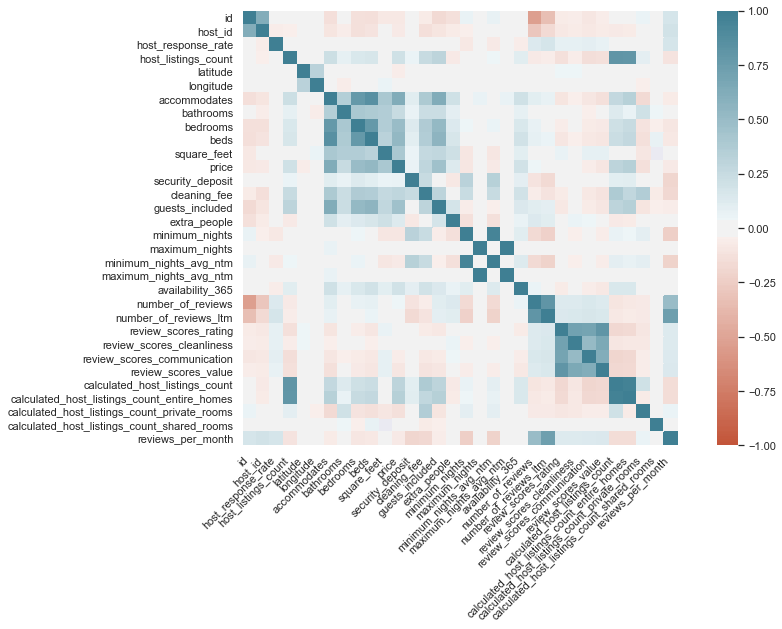

In [222]:
ax = sns.heatmap(
    cormatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [32]:
listings = listings.drop(columns=['review_scores_checkin', 'minimum_minimum_nights', 'maximum_minimum_nights', 'review_scores_accuracy', 
                                  'review_scores_location', 'minimum_maximum_nights', 'maximum_maximum_nights', 'scrape_id', 'host_total_listings_count',
                                 'availability_60', 'availability_90', 'availability_30'])



In [38]:
listings = listings.drop(columns=['experiences_offered', 'listing_url', 'last_scraped', 'picture_url' ,'host_url',
                                 'host_thumbnail_url', 'host_picture_url','calendar_updated', 'calendar_last_scraped'])



In [147]:
analyze_df = listings.drop(columns=['name','summary','space', 'description','neighborhood_overview','transit','access','interaction','house_rules',
                                   'host_name','host_about','host_location','host_verifications','street','city', 'state','market','smart_location',
                                   'country_code','country','is_location_exact','amenities','weekly_price','monthly_price'])
analyze_df.to_csv('analyze_df.csv')

In [171]:
analyze_df['accommodates'].value_counts()

2     7969
4     3608
1     2913
6     1961
3     1522
5     1204
8      577
7      350
10     176
9      107
12      57
16      55
14      24
11      17
15       8
13       7
18       1
Name: accommodates, dtype: int64

In [219]:
analyze_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19901 entries, 0 to 20555
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19901 non-null  int64  
 1   host_id                                       19901 non-null  int64  
 2   host_since                                    19891 non-null  object 
 3   host_response_time                            17398 non-null  object 
 4   host_response_rate                            17398 non-null  float64
 5   host_is_superhost                             19891 non-null  object 
 6   host_neighbourhood                            16009 non-null  object 
 7   host_listings_count                           19891 non-null  float64
 8   host_has_profile_pic                          19891 non-null  object 
 9   host_identity_verified                        19891 non-null 

In [76]:
pd.get_dummies(analyze_df['neighbourhood_group_cleansed'])

,Ciutat Vella,Eixample,Gràcia,Horta-Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi
0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
20551,0,1,0,0,0,0,0,0,0,0
20552,1,0,0,0,0,0,0,0,0,0
20553,0,0,1,0,0,0,0,0,0,0
20554,1,0,0,0,0,0,0,0,0,0


In [77]:
cormatrix_2

,id,host_id,host_response_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,1.000000,0.611669,-0.040881,0.002978,-0.033039,0.010015,-0.140310,-0.045487,-0.135563,-0.138825,-0.075200,-0.002896,0.035470,-0.072665,-0.162934,-0.106708,0.067059,-0.014245,0.070395,-0.014245,-0.023155,-0.531394,-0.333966,-0.065463,-0.056241,-0.087906,-0.060677,0.000996,-0.014490,0.056905,0.024678,0.178798
host_id,0.611669,1.000000,-0.071389,-0.059034,-0.036162,0.022482,-0.114441,-0.066507,-0.134829,-0.120265,0.011185,-0.010395,-0.030784,-0.149700,-0.107906,-0.049079,-0.041676,-0.007076,-0.035710,-0.007077,-0.024975,-0.293047,-0.169345,-0.080977,-0.063158,-0.082314,-0.060995,-0.087952,-0.083221,-0.021879,-0.015450,0.190559
host_response_rate,-0.040881,-0.071389,1.000000,-0.002865,-0.005894,-0.024822,0.015930,0.010631,0.007025,0.005757,0.010229,-0.029121,-0.037295,-0.010666,0.033899,0.016419,-0.077850,0.002725,-0.070767,0.002725,-0.057205,0.135637,0.178093,0.082520,0.075533,0.099605,0.071506,0.009756,0.003853,0.020899,0.022432,0.173775
host_listings_count,0.002978,-0.059034,-0.002865,1.000000,-0.007120,0.007658,0.221429,0.085839,0.156427,0.163773,-0.003399,0.047562,0.057365,0.264374,0.299697,-0.074121,0.016998,-0.002929,0.037744,-0.002930,0.121812,-0.074111,-0.048633,-0.132484,-0.051699,-0.139591,-0.125909,0.815596,0.805673,0.086867,-0.014261,-0.112463
latitude,-0.033039,-0.036162,-0.005894,-0.007120,1.000000,0.319598,-0.004244,-0.012235,0.031103,0.008783,0.030197,-0.012062,-0.021714,-0.015573,-0.015325,0.005836,-0.017529,-0.010862,-0.015104,-0.010862,0.006313,-0.019844,-0.020894,0.040927,0.042757,0.016644,0.036015,-0.011511,-0.009754,-0.006467,-0.010706,-0.038287
longitude,0.010015,0.022482,-0.024822,0.007658,0.319598,1.000000,0.009212,-0.046093,-0.011009,-0.000541,0.065422,-0.004910,0.030421,0.012690,-0.008470,0.011584,0.028169,-0.014951,0.025255,-0.014951,0.005950,-0.000924,0.007021,0.012121,-0.008764,0.000839,0.001925,-0.013129,-0.000984,-0.044145,-0.033923,0.016473
accommodates,-0.140310,-0.114441,0.015930,0.221429,-0.004244,0.009212,1.000000,0.424698,0.807670,0.857290,0.413598,0.164599,0.123622,0.429322,0.639735,0.187268,-0.017180,0.057880,-0.003197,0.057880,0.214324,0.090727,0.061915,-0.096145,-0.040521,-0.093083,-0.123409,0.279223,0.328110,-0.166742,-0.033274,-0.078525
bathrooms,-0.045487,-0.066507,0.010631,0.085839,-0.012235,-0.046093,0.424698,1.000000,0.469379,0.456526,0.372962,0.108917,0.084357,0.286929,0.279665,0.095145,0.022549,-0.004928,0.026645,-0.004928,0.100256,-0.003872,-0.023801,-0.023875,-0.027619,-0.037705,-0.026093,0.123276,0.078157,0.175638,0.038617,-0.048072
bedrooms,-0.135563,-0.134829,0.007025,0.156427,0.031103,-0.011009,0.807670,0.469379,1.000000,0.799588,0.402001,0.135734,0.133446,0.411833,0.539128,0.133401,0.031956,0.004482,0.037288,0.004482,0.165238,0.060374,0.028372,-0.049057,-0.017473,-0.063009,-0.069273,0.220668,0.255940,-0.117572,-0.043336,-0.096493
beds,-0.138825,-0.120265,0.005757,0.163773,0.008783,-0.000541,0.857290,0.456526,0.799588,1.000000,0.370308,0.145061,0.114127,0.405893,0.575208,0.152155,-0.002067,0.004226,0.009491,0.004226,0.196985,0.066155,0.036116,-0.078709,-0.037479,-0.079078,-0.090925,0.241726,0.274716,-0.117010,0.069338,-0.088822


In [51]:
cormatrix_2 = analyze_df.corr()
cormatrix_2['price'].sort_values()

reviews_per_month                              -0.065418
number_of_reviews_ltm                          -0.044268
number_of_reviews                              -0.038436
review_scores_communication                    -0.037533
minimum_nights                                 -0.034154
review_scores_value                            -0.032602
minimum_nights_avg_ntm                         -0.029771
host_response_rate                             -0.029121
review_scores_rating                           -0.014234
latitude                                       -0.012062
host_id                                        -0.010395
calculated_host_listings_count_private_rooms   -0.006141
longitude                                      -0.004910
id                                             -0.002896
maximum_nights                                 -0.000860
maximum_nights_avg_ntm                         -0.000860
review_scores_cleanliness                       0.003380
security_deposit               

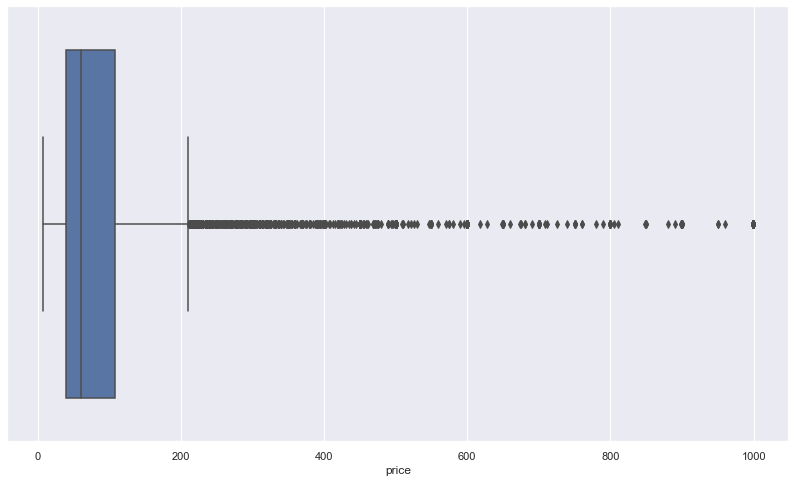

In [181]:
sns.set(rc={'figure.figsize': (14, 8)})
sns.boxplot(x = 'price', data = analyze_df)


In [186]:
analyze_df.price.describe()

count    19901.000000
mean        82.423044
std         65.231613
min          7.000000
25%         39.000000
50%         60.000000
75%        100.000000
max        399.000000
Name: price, dtype: float64

In [244]:
analyze_df = analyze_df[(analyze_df['price']> 20) & (analyze_df['price']< 400)]
analyze_df.count()


id                                              19012
host_id                                         19012
host_since                                      19002
host_response_time                              16736
host_response_rate                              16736
host_is_superhost                               19002
host_neighbourhood                              15323
host_listings_count                             19002
host_has_profile_pic                            19002
host_identity_verified                          19002
neighbourhood                                   19004
neighbourhood_cleansed                          19012
neighbourhood_group_cleansed                    19012
zipcode                                         18431
latitude                                        19012
longitude                                       19012
property_type                                   19012
room_type                                       19012
accommodates                

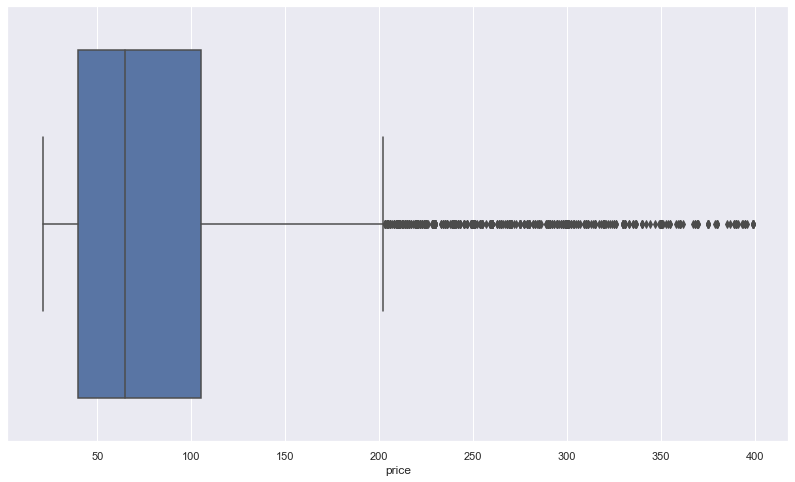

In [237]:
sns.set(rc={'figure.figsize': (14, 8)})
sns.boxplot(x = 'price', data = analyze_df)


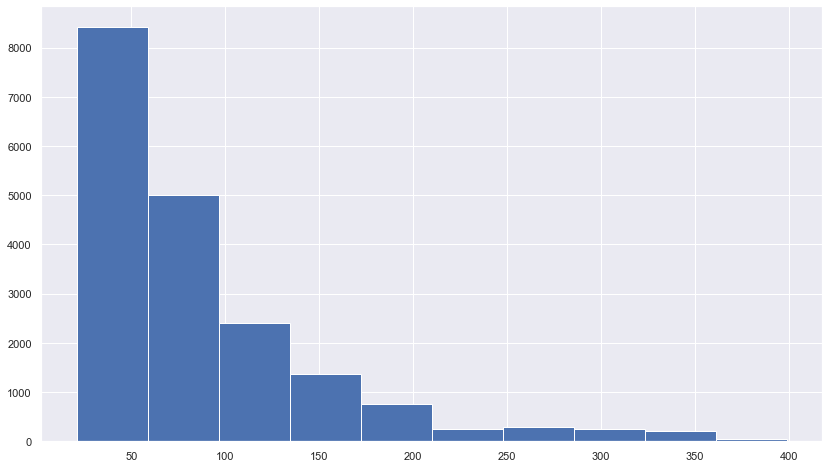

In [238]:
analyze_df[analyze_df['price']<1000]['price'].hist()

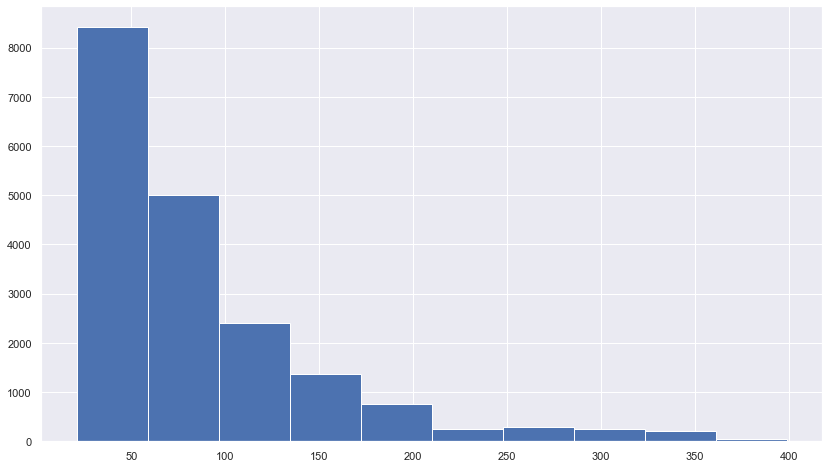

In [239]:
analyze_df['price'].hist()

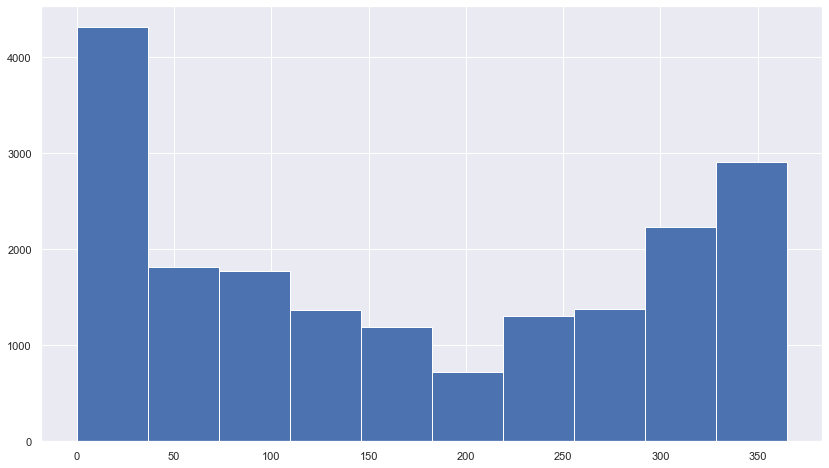

In [240]:
analyze_df['availability_365'].hist()

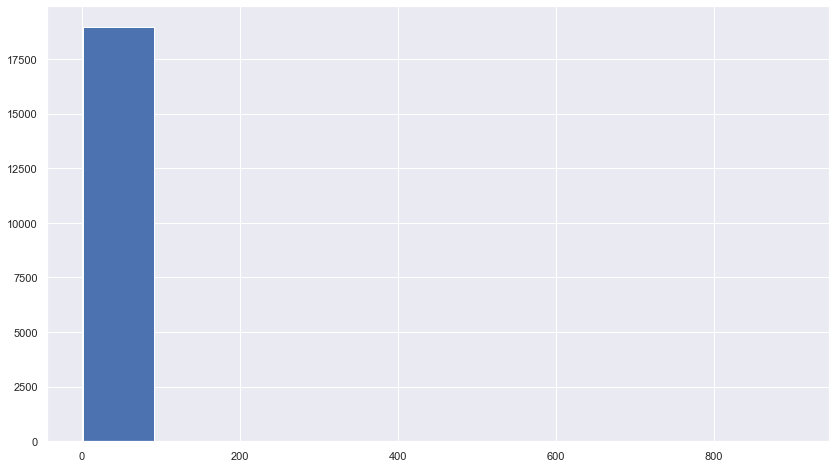

In [241]:
analyze_df['minimum_nights_avg_ntm'].hist()

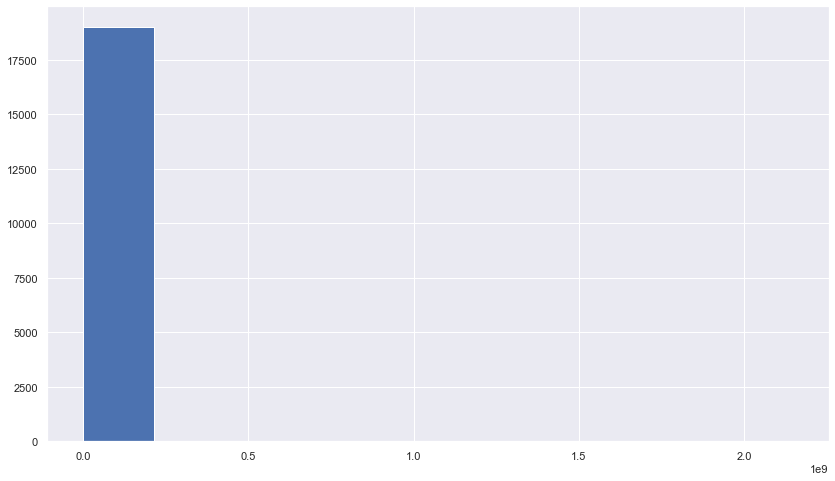

In [242]:
# Confused! Makes no sense
analyze_df['maximum_nights_avg_ntm'].hist()

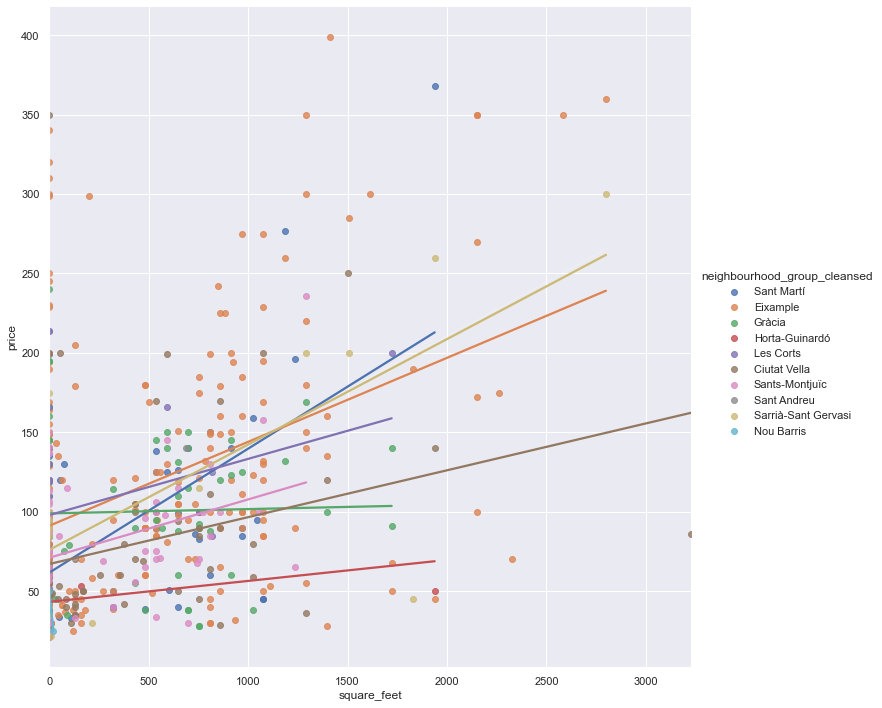

In [243]:
price_vs_sqft = sns.lmplot(x = 'square_feet', y = 'price', data = analyze_df, height = 10, hue = 'neighbourhood_group_cleansed', 
                ci = False)


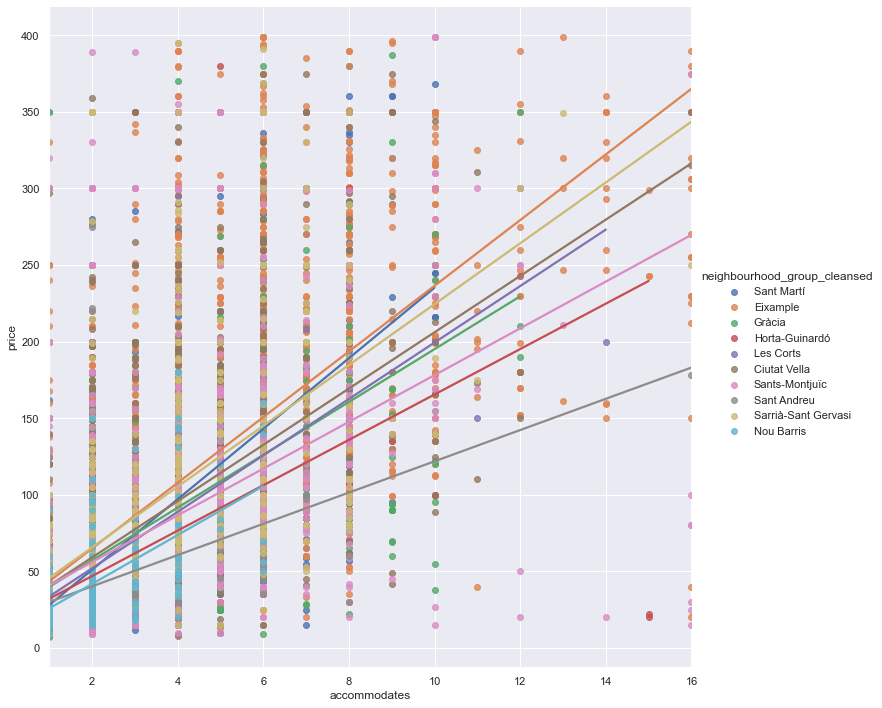

In [189]:
price_vs_accom = sns.lmplot(x = 'accommodates', y = 'price', data = analyze_df, height = 10, hue = 'neighbourhood_group_cleansed', 
                ci = False)


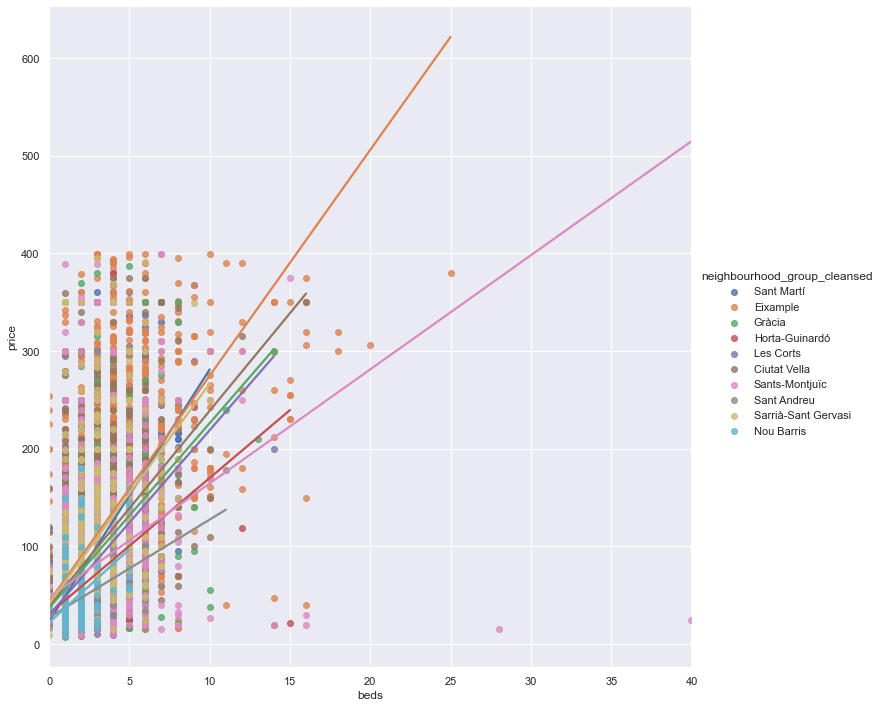

In [190]:
price_vs_bed = sns.lmplot(x = 'beds', y = 'price', data = analyze_df, height = 10, hue = 'neighbourhood_group_cleansed', 
                ci = False)


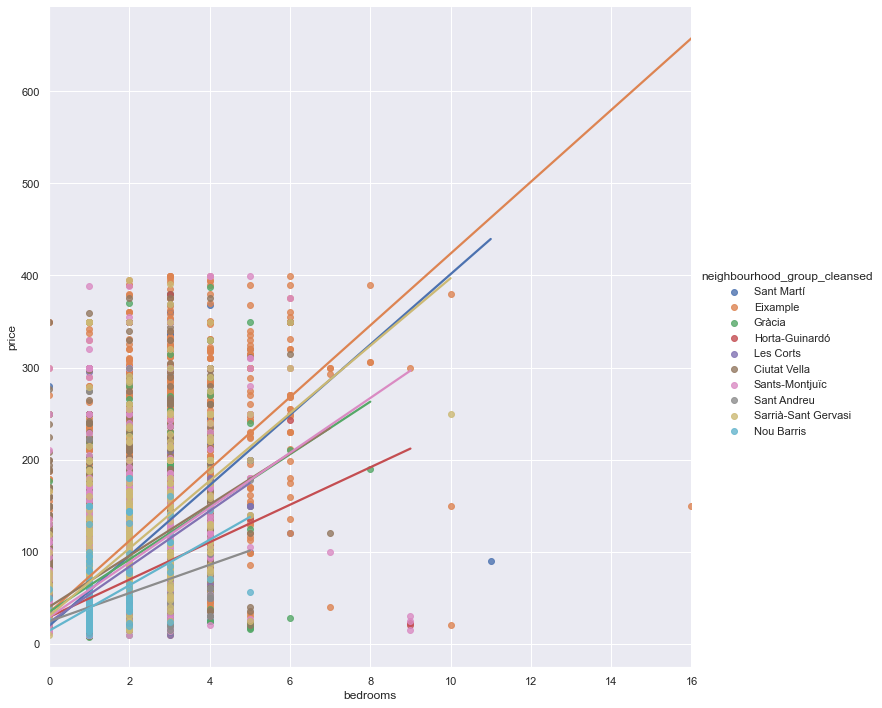

In [191]:
price_vs_bdrms = sns.lmplot(x = 'bedrooms', y = 'price', data = analyze_df, height = 10, hue = 'neighbourhood_group_cleansed', 
                ci = False)


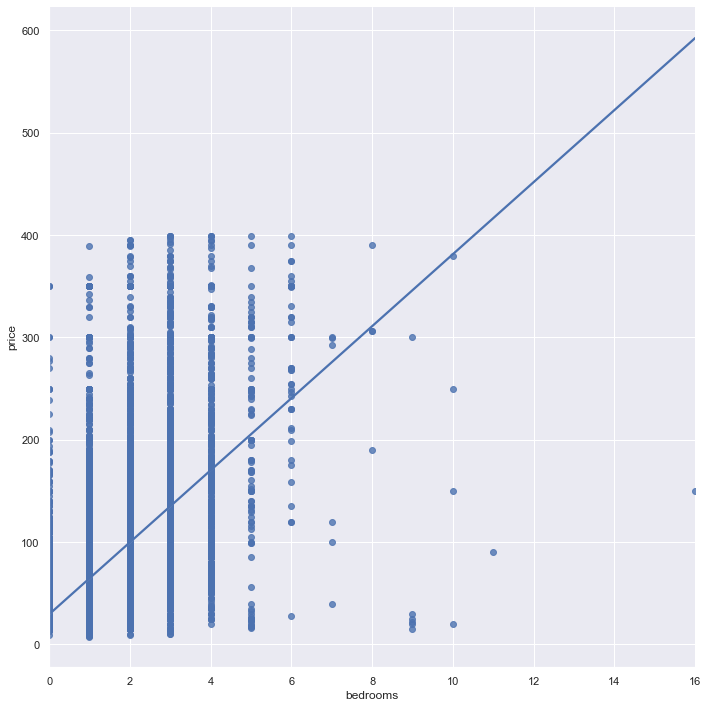

In [195]:
price_vs_bdrms2 = sns.lmplot(x = 'bedrooms', y = 'price', data = analyze_df, height = 10,
                ci = False)


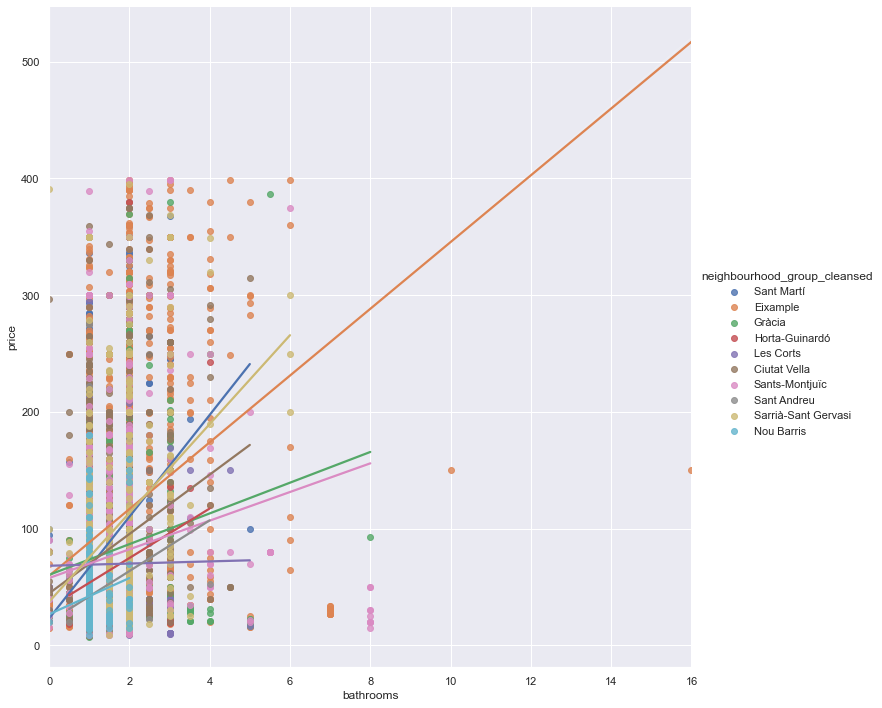

In [193]:
sns.lmplot(x = 'bathrooms', y = 'price', data = analyze_df, height = 10, hue = 'neighbourhood_group_cleansed', 
                ci = False)


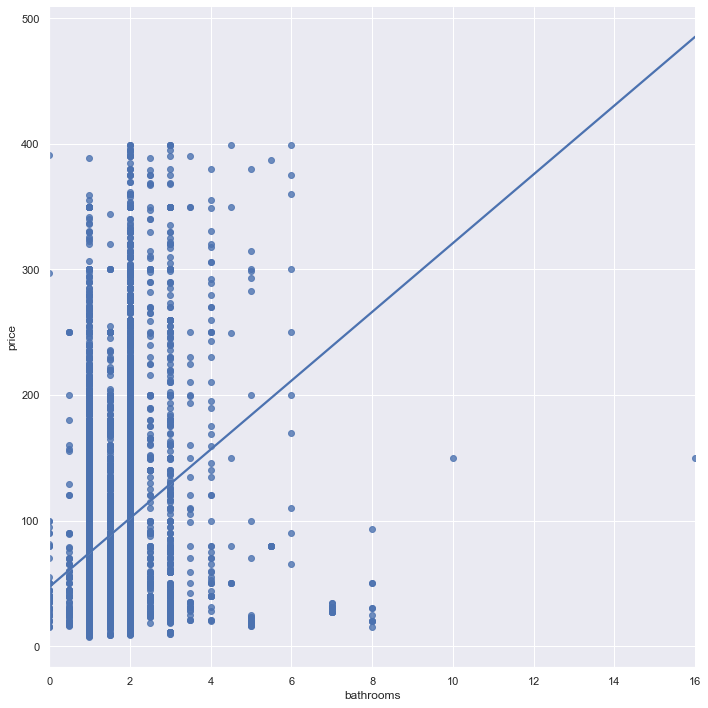

In [194]:
sns.lmplot(x = 'bathrooms', y = 'price', data = analyze_df, height = 10, 
                ci = False)


# Modeling

In [245]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error

In [122]:
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)


In [140]:
modeling_df.info()
extra_people                                    0.132509
availability_365                                0.194467
host_listings_count                             0.200311
bathrooms                                       0.251606
cleaning_fee                                    0.296656
calculated_host_listings_count                  0.307680
calculated_host_listings_count_entire_homes     0.351089
square_feet                                     0.401121
guests_included                                 0.468016
bedrooms                                        0.505712
beds                                            0.538279
accommodates

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20516 entries, 0 to 20555
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   accommodates      20516 non-null  int64  
 1   beds              20516 non-null  float64
 2   bathrooms         20516 non-null  float64
 3   guests_included   20516 non-null  int64  
 4   availability_365  20516 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 961.7 KB


In [196]:
modeling_cols = ['price','accommodates','beds','bedrooms','bathrooms', 'guests_included' ,'availability_365', 'neighbourhood_group_cleansed']

#for now i'm just dropping nulls, you should impute them or something later
modeling_df = analyze_df[modeling_cols].dropna()




In [197]:
modeling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19864 entries, 0 to 20555
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         19864 non-null  float64
 1   accommodates                  19864 non-null  int64  
 2   beds                          19864 non-null  float64
 3   bedrooms                      19864 non-null  float64
 4   bathrooms                     19864 non-null  float64
 5   guests_included               19864 non-null  int64  
 6   availability_365              19864 non-null  int64  
 7   neighbourhood_group_cleansed  19864 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 1.4+ MB


In [198]:
#x = modeling_df[['host_listings_count','bedrooms','bathrooms']].values
#y = modeling_df['price']

In [262]:
train, test = statsmodels_train_test_split(modeling_df)

In [263]:
formula = 'price ~ accommodates + bedrooms + bathrooms + C(neighbourhood_group_cleansed)'
lm = smf.ols(formula=formula, data=train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     824.2
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:33:25   Log-Likelihood:                -79699.
No. Observations:               14898   AIC:                         1.594e+05
Df Residuals:                   14885   BIC:                         1.595e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 18.1628      1.247     14.571      0.000      15.720      20.606
C(neighbourhood_group_cleansed)[T.Eixample]                9.4454      1.139      8.292      0.000       7.213      11.678
C(neighbourhood_group_cleansed)[T.Gràcia]                 -3.9188      1.677     -2.337      0.019      -7.206      -0.632
C(neighbourhood_group_cleansed)[T.Horta-Guinardó]        -13.4270      2.438     -5.508      0.000     -18.205      -8.649
C(neighbourhood_group_cleansed)[T.Les Corts]              -8.4544      2.966     -2.851      0.004     -14.267      -2.641
C(neighbourhood_group_cleansed)[T.Nou Barris]            -19.1303      3.821     -5.006      0.000     -26.621     -11.640
C(neighbourhood_group_cleansed)[T.Sant Andreu]           -23.7698      3.233     -7.352      0.000     -30.108     -17.432
C(neighbourhood_group_cleansed)[T.Sant Martí]             -5.2486      1.561     -3.362      0.001      -8.308      -2.189
C(neighbourhood_group_cleansed)[T.Sants-Montjuïc]         -7.9604      1.492     -5.336      0.000     -10.884      -5.036
C(neighbourhood_group_cleansed)[T.Sarrià-Sant Gervasi]     8.2842      2.285      3.625      0.000       3.805      12.764
accommodates                                              18.3809      0.333     55.138      0.000      17.727      19.034
bedrooms                                                   2.4945      0.738      3.382      0.001       1.049       3.940
bathrooms                                                  1.2856      0.757      1.699      0.089      -0.197       2.769
==============================================================================
Omnibus:                     5840.842   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36339.648
Skew:                           1.764   Prob(JB):                         0.00
Kurtosis:                       9.789   Cond. No.                         42.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [264]:
y_test_pred = lm.predict(test)
r2_score(test['price'], y_test_pred)

0.4391956093073571

In [265]:
y_test_pred.head()

8768     107.406347
3903      49.769205
9241     107.406347
2431      66.988829
19444     54.741657
dtype: float64

In [266]:
test.head()

,accommodates,beds,bedrooms,bathrooms,guests_included,availability_365,neighbourhood_group_cleansed,price
8768,4,2.0,2.0,1.0,1,127,Eixample,80.0
3903,1,1.0,1.0,1.0,1,361,Eixample,18.0
9241,4,3.0,2.0,1.0,2,119,Eixample,108.0
2431,2,1.0,1.0,1.0,1,14,Sarrià-Sant Gervasi,100.0
19444,2,1.0,1.0,2.0,1,72,Sant Martí,40.0


## Model 2

In [267]:
modeling_cols2 = ['price','square_feet','accommodates','beds','bedrooms','bathrooms', 'guests_included' ,'availability_365', 'neighbourhood_group_cleansed']
modeling_df2 = analyze_df[modeling_cols2].dropna()

modeling_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 16443
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         498 non-null    float64
 1   square_feet                   498 non-null    float64
 2   accommodates                  498 non-null    int64  
 3   beds                          498 non-null    float64
 4   bedrooms                      498 non-null    float64
 5   bathrooms                     498 non-null    float64
 6   guests_included               498 non-null    int64  
 7   availability_365              498 non-null    int64  
 8   neighbourhood_group_cleansed  498 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 38.9+ KB


In [268]:
train2, test2 = statsmodels_train_test_split(modeling_df2)

In [269]:
formula2 = 'price ~ accommodates + square_feet + bedrooms + bathrooms + C(neighbourhood_group_cleansed)'
lm2 = smf.ols(formula=formula, data=train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     824.2
Date:                Thu, 24 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:38:41   Log-Likelihood:                -79699.
No. Observations:               14898   AIC:                         1.594e+05
Df Residuals:                   14885   BIC:                         1.595e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 18.1628      1.247     14.571      0.000      15.720      20.606
C(neighbourhood_group_cleansed)[T.Eixample]                9.4454      1.139      8.292      0.000       7.213      11.678
C(neighbourhood_group_cleansed)[T.Gràcia]                 -3.9188      1.677     -2.337      0.019      -7.206      -0.632
C(neighbourhood_group_cleansed)[T.Horta-Guinardó]        -13.4270      2.438     -5.508      0.000     -18.205      -8.649
C(neighbourhood_group_cleansed)[T.Les Corts]              -8.4544      2.966     -2.851      0.004     -14.267      -2.641
C(neighbourhood_group_cleansed)[T.Nou Barris]            -19.1303      3.821     -5.006      0.000     -26.621     -11.640
C(neighbourhood_group_cleansed)[T.Sant Andreu]           -23.7698      3.233     -7.352      0.000     -30.108     -17.432
C(neighbourhood_group_cleansed)[T.Sant Martí]             -5.2486      1.561     -3.362      0.001      -8.308      -2.189
C(neighbourhood_group_cleansed)[T.Sants-Montjuïc]         -7.9604      1.492     -5.336      0.000     -10.884      -5.036
C(neighbourhood_group_cleansed)[T.Sarrià-Sant Gervasi]     8.2842      2.285      3.625      0.000       3.805      12.764
accommodates                                              18.3809      0.333     55.138      0.000      17.727      19.034
bedrooms                                                   2.4945      0.738      3.382      0.001       1.049       3.940
bathrooms                                                  1.2856      0.757      1.699      0.089      -0.197       2.769
==============================================================================
Omnibus:                     5840.842   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36339.648
Skew:                           1.764   Prob(JB):                         0.00
Kurtosis:                       9.789   Cond. No.                         42.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [270]:
cormatrix2 = analyze_df.corr()
cormatrix['price'].sort_values()

calculated_host_listings_count_private_rooms   -0.130799
minimum_nights                                 -0.099755
review_scores_value                            -0.088440
id                                             -0.082793
host_id                                        -0.075915
minimum_nights_avg_ntm                         -0.075872
reviews_per_month                              -0.073638
latitude                                       -0.054660
review_scores_communication                    -0.052083
calculated_host_listings_count_shared_rooms    -0.038179
review_scores_rating                           -0.037779
maximum_nights                                  0.001167
maximum_nights_avg_ntm                          0.001167
longitude                                       0.001333
review_scores_cleanliness                       0.017149
host_response_rate                              0.017851
number_of_reviews_ltm                           0.029429
number_of_reviews              

In [271]:
y_test_pred2 = lm.predict(test2)
r2_score(test2['price'], y_test_pred2)

0.5243494507134485

In [272]:
y_test_pred2.head()

1251    144.168136
711     110.381856
1507     71.287362
37      125.787242
630     210.557797
dtype: float64

In [273]:
test2.head()

,square_feet,accommodates,beds,bedrooms,bathrooms,guests_included,availability_365,neighbourhood_group_cleansed,price
1251,0.0,6,4.0,2.0,1.0,2,287,Eixample,100.0
711,0.0,5,4.0,3.0,1.0,2,32,Les Corts,120.0
1507,0.0,2,1.0,2.0,1.5,3,5,Eixample,115.0
37,646.0,5,3.0,2.0,1.0,2,309,Eixample,105.0
630,1938.0,10,9.0,4.0,3.0,6,350,Sant Martí,368.0
